# Up and Down the Python Data and Web Visualization Stack

## To view charts: Click "Launch" above-right to run the notebook.

In 2014, Rob Story presented an IPython notebook comparing some of the various web visualization libraries for Python. The original repository is [here](https://github.com/wrobstory/pydatasv2014/blob/master/Up%20and%20Down%20PyData%202014.ipynb). With all of the various visualization libraries coming out for Python, it was nice to see how they all looked in one place. 

We are aiming to very literally re-create that notebook here with a few small updates. Through Domino, we hope that you will be able to interactively explore the ins and outs of working with these various visualization libraries that are presented here.

We will explore the following Python libraries in this Jupyter notebook:
1. vincent
2. ggplot
3. bokeh
4. pygal
4. bearcart
4. Seaborn
5. matplotlib
6. folium


### Loading libraries

In [1]:
from collections import OrderedDict

import bearcart
import bokeh
import bokeh.plotting as bp
from bokeh.plotting import output_notebook
import folium
import ggplot as gg
from ggplot import ggplot
import matplotlib.pyplot as plt
#import mpld3
import numpy as np
import pandas as pd
import vincent


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#mpld3.enable_notebook()
bearcart.initialize_notebook()
vincent.core.initialize_notebook()
folium.initialize_notebook()

# axis_color = 'black'
axis_color = '#d0d0d0'

# The Data

We will be using the USGS dataset listing every wind turbine in the United States for the visualizations in this notebook. We will be sourcing our data from 2 different files: 
1. `USGS_WindTurbine_201307_cleaned.csv`, which contains data about each wind turbine in the US
2. `CO_WS_2011_2012.txt`, which contains data about the wind speed at various elevations and locations across time.

First, we load the data using Pandas and do some cleaning and filtering of the data to put it in a usable state.

In [2]:
df = pd.read_csv('USGS_WindTurbine_201307_cleaned.csv')
df.head()

Unnamed: 0  Unique ID        Site Name Online Year Turbine Manufacturer  \
0           0       1836       Sand Point        2012               Vestas   
1           1       1837       Sand Point        2012               Vestas   
2           2       1838  St. Paul Island        2007               Vestas   
3           3       1839  St. Paul Island        1999               Vestas   
4           4       1840  St. Paul Island        2007               Vestas   

  Turbine Model Tower Type  Turbine MW  Total Height  Tower/Hub Height  \
0           V39   monopole       0.500          59.5              40.0   
1           V39   monopole       0.500          59.5              40.0   
2           V27   monopole       0.225          50.5              37.0   
3           V27   monopole       0.225          50.5              37.0   
4           V27   monopole       0.225          50.5              37.0   

                 ...                  Attribute Confidence  \
0                ...                                     2   
1                ...                                     2   
2                ...                                     2   
3                ...                                     2   
4                ...                                     2   

   Location Confidence  WENDI Site Name  EIA Site Name  FAA-JDATE FAA-AGL  \
0                    2          unknown        unknown  2011154.0    59.0   
1                    2          unknown        unknown  2011163.0    59.0   
2                    2  St. Paul Island        unknown  2008128.0    54.0   
3                    2  St. Paul Island        unknown  2008130.0    55.0   
4                    2  St. Paul Island        unknown  2008128.0    55.0   

     FAA-ORS  Image Source Name  Image Source Year  \
0  02-020194      Digital Globe            unknown   
1  02-020196      Digital Globe            unknown   
2  02-020007   Bing Maps Aerial            unknown   
3  02-000669   Bing Maps Aerial            unknown   
4  02-020012   Bing Maps Aerial            unknown   

                            Comments  
0                                     
1                                     
2  AGL and total height do not match  
3  AGL and total height do not match  
4  AGL and total height do not match  

[5 rows x 27 columns]

In [3]:
ws = pd.read_table('CO_WS_2011_2012.txt')
ws = ws.set_index('Date & Time Stamp')
ws.index = ws.index.to_datetime()
ws.head()

WS1_50mMean  WS1_50mStdev  WS1_50mMax  WS1_50mMin  \
2011-06-03 00:00:00         9.50          1.12       11.70        6.40   
2011-06-03 00:10:00         8.37          0.56       10.19        6.78   
2011-06-03 00:20:00         8.38          0.43        9.44        7.17   
2011-06-03 00:30:00         7.48          1.17        9.44        3.76   
2011-06-03 00:40:00         7.13          0.79        9.06        5.26   

                     WS2_50mMean  WS2_50mStDev  WS2_50mMax  WS2_50mMin  \
2011-06-03 00:00:00         9.39          1.03       11.39        6.43   
2011-06-03 00:10:00         8.27          0.56        9.86        6.43   
2011-06-03 00:20:00         8.28          0.41        9.48        7.20   
2011-06-03 00:30:00         7.43          1.12        9.48        3.77   
2011-06-03 00:40:00         7.10          0.76        9.09        5.28   

                     WS3_30mMean  WS3_30mStDev     ...      WS4_40mMax  \
2011-06-03 00:00:00         7.96          1.33     ...           11.01   
2011-06-03 00:10:00         6.83          0.76     ...            9.49   
2011-06-03 00:20:00         7.13          0.64     ...            9.10   
2011-06-03 00:30:00         6.43          1.03     ...            9.10   
2011-06-03 00:40:00         6.21          0.67     ...            8.34   

                     WS4_40mMin  WD1_49mMean  WD1_49mStDev  WD1_49mMax  \
2011-06-03 00:00:00        4.95          172             7         173   
2011-06-03 00:10:00        5.70          172             5         169   
2011-06-03 00:20:00        6.83          169             5         177   
2011-06-03 00:30:00        3.43          163            11         166   
2011-06-03 00:40:00        3.81          172            12         166   

                     WD1_49mMin  WD2_38mMean  WD2_38mStDev  WD2_38mMax  \
2011-06-03 00:00:00         240          186             7         185   
2011-06-03 00:10:00         240          188             6         198   
2011-06-03 00:20:00         240          185             4         178   
2011-06-03 00:30:00         240          179             8         174   
2011-06-03 00:40:00         240          188            12         178   

                     WD2_38mMin  
2011-06-03 00:00:00         168  
2011-06-03 00:10:00         168  
2011-06-03 00:20:00         168  
2011-06-03 00:30:00         168  
2011-06-03 00:40:00         168  

[5 rows x 24 columns]

# [Vincent](https://vincent.readthedocs.org/en/latest/): A Python to Vega Translator

The first library that we cover is Vincent.

From the Vincent docs:

*The folks at Trifacta are making it easy to build visualizations on top of [D3](https://d3js.org/) with [Vega](https://vega.github.io/vega/). Vincent makes it easy to build Vega with Python.*

### *Concept*
*The data capabilities of Python. The visualization capabilities of JavaScript.*

*Vincent allows you to build Vega specifications in a Pythonic way, and performs type-checking to help ensure that your specifications are correct. It also has a number of convenience chart-building methods that quickly turn Python data structures into Vega visualization grammar, enabling graphical exploration. It allows for quick iteration of visualization designs via getters and setters on grammar elements, and outputs the final visualization to JSON.*

*Perhaps most importantly, Vincent has Pandas-Fu, and is built specifically to allow for quick plotting of DataFrames and Series.*

In [4]:
# Rotor Diameter vs. Turbine Manufacturer
mf_grouped = df.groupby('Turbine Manufacturer')
mean_grouped = mf_grouped.mean().dropna()
mean_rd = mean_grouped.sort_values(by='Rotor Diameter')['Rotor Diameter']
rotor_diam = vincent.Bar(mean_rd)
rotor_diam.axis_titles(x='Turbine Manufacturer', y='Rotor Diameter')
# The Hard Way
from vincent.axes import AxisProperties
from vincent.properties import PropertySet
from vincent.values import ValueRef
for axis in rotor_diam.axes:
    axis.properties = AxisProperties()
    for prop in ['ticks', 'axis', 'major_ticks', 'minor_ticks']:
        setattr(axis.properties, prop, PropertySet(stroke=ValueRef(value=axis_color)))
    axis.properties.title = PropertySet(font_size=ValueRef(value=20), 
                                        fill=ValueRef(value=axis_color))
    axis.properties.labels = PropertySet(fill=ValueRef(value=axis_color))
rotor_diam.axes[0].properties.labels.angle = ValueRef(value=50)
rotor_diam.axes[0].properties.labels.align = ValueRef(value='left')
rotor_diam.axes[0].properties.title.dy = ValueRef(value=115)
rotor_diam.scales[2].range = ['#b48ead']
rotor_diam.grammar()
rotor_diam

In [5]:
# Total Turbine Count
turbine_ct = mf_grouped.count().dropna().sort_values(by='Unique ID', ascending=False)['Unique ID']
num_turbines = (vincent.Bar(turbine_ct[:25])
                       .axis_titles(x='Turbine Manufacturer', 
                                    y='Number of Turbines in the US')
                       .colors(range_=['#6a9fb5']))
# Shortcuts!
def lighten_axes(vis, x_offset=50):
    (vis.common_axis_properties(color=axis_color, title_size=20)
        .x_axis_properties(label_angle=50, label_align='left', 
                           title_offset=x_offset)
        .y_axis_properties(title_offset=-40))
# If Area Chart
# num_turbines.scales[0].type = 'ordinal'
lighten_axes(num_turbines)
num_turbines

In [6]:
# Turbine Count vs. Date
grouped_date = df.groupby(['Online Year', 'Turbine Manufacturer'])
by_year = grouped_date.count()['Unique ID'].reset_index()
by_year['Online Year'] = pd.to_datetime(by_year['Online Year'], errors='coerce')
by_year = by_year.rename(columns={'Unique ID': 'Turbine Count'}).dropna()
by_year = by_year.pivot(index='Online Year', columns='Turbine Manufacturer', values='Turbine Count')
by_year = by_year[turbine_ct[:10].index.tolist()]

online_by_year = (vincent.StackedArea(by_year)
                         .axis_titles(x='Date', y='Turbine Count')
                         .legend(title='Turbine Manufacturer', text_color=axis_color)
                         .colors(range_=['#ac4142', '#d28445', '#f4bf75', '#90a959', 
                                         '#75b5aa', '#6a9fb5', '#aa759f', '#8f5536']))
lighten_axes(online_by_year, x_offset=30)
online_by_year

In [7]:
height_diam = (vincent.GroupedBar(mean_grouped[['Tower/Hub Height', 'Rotor Diameter']]
                                  .sort_values(by=['Rotor Diameter', 'Tower/Hub Height'], ascending=False))
                      .axis_titles(x='Turbine Manufacturer', y='Meters')
                      .legend(title='Parameters', text_color=axis_color)
                      .colors(range_=['#f4bf75', '#75b5aa']))
lighten_axes(height_diam, 100)
height_diam

In [8]:
november_2011 = ws['2011-11-15':'2011-12-01']
ws_line = (vincent.Line(november_2011['WS1_50mMean'])
                  .axis_titles(x='Date', y='Wind Speed (m/s)')
                  .colors(range_=['#d28445']))
lighten_axes(ws_line, x_offset=30)
ws_line

In [9]:
# Rotor Diameter vs. Power
min_heights = df[df['Rotor Diameter'] > 10]
diameter_vs_mw = (vincent.Scatter(min_heights[['Turbine MW', 'Rotor Diameter']], iter_idx='Turbine MW')
                         .axis_titles(x='Power (MW)', y='Rotor Diameter (m)')
                         .colors(range_=['#75b5aa']))
lighten_axes(diameter_vs_mw, x_offset=30)
diameter_vs_mw

# ggplot

The second stop on the tour will be `ggplot`. `ggplot2` has long been a library in R that many people point to as being one of the reasons that R is superior to Python. 

Recently, the folks at yhat developed a library called `ggplot` for Python that is inspired by R's famous `ggplot2` library. You can read the docs on how to use `ggplot` [here](http://ggplot.yhathq.com/).

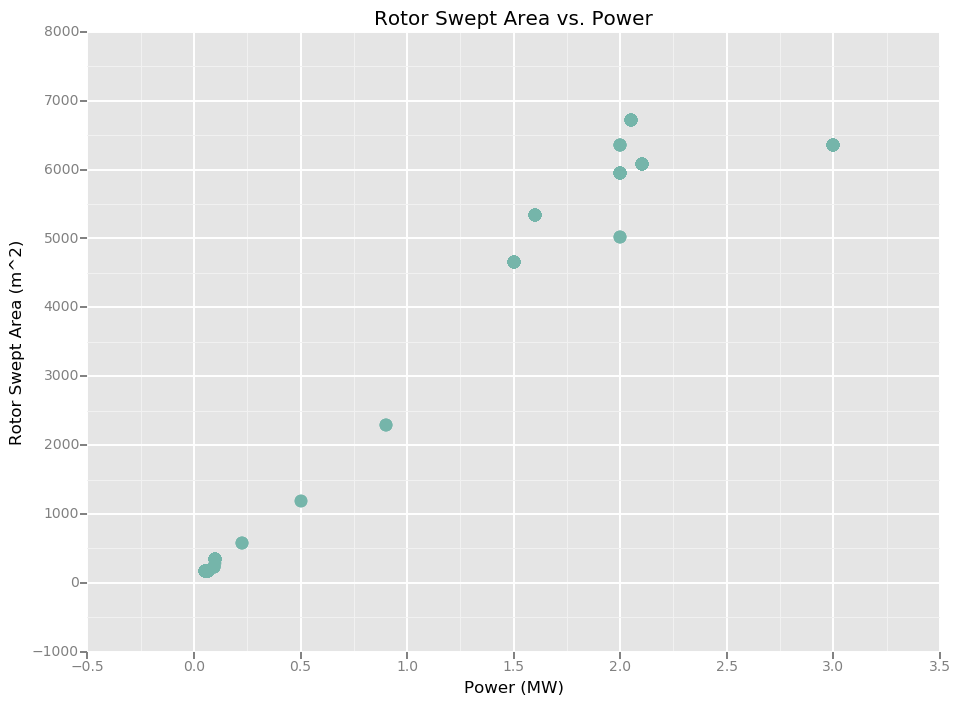

<ggplot: (8768284885833)>

In [10]:
(ggplot(gg.aes(x='Turbine MW', y='Rotor Swept Area'), data=min_heights[:500])\
    + gg.geom_point(color='#75b5aa', size=75)\
    + gg.ggtitle("Rotor Swept Area vs. Power")\
    + gg.xlab("Power (MW)")\
    + gg.ylab("Rotor Swept Area (m^2)"))

stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.


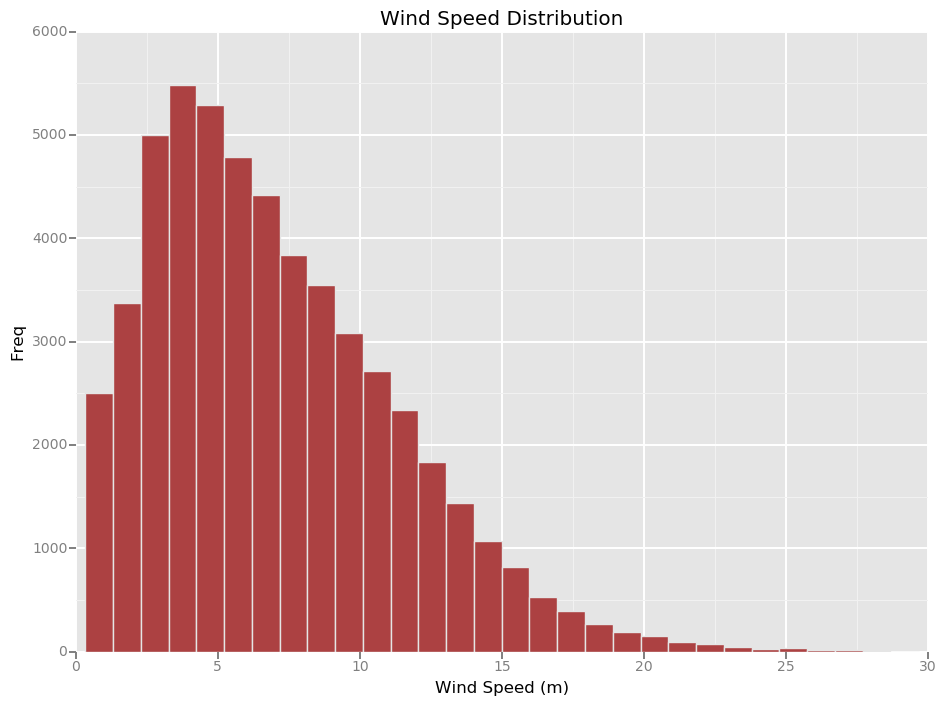

<ggplot: (8768284624881)>

In [11]:
(ggplot(gg.aes(x='WS1_50mMean'), data=ws)\
    + gg.geom_histogram(fill='#ac4142') \
    + gg.ggtitle("Wind Speed Distribution") \
    + gg.labs("Wind Speed (m)", "Freq"))

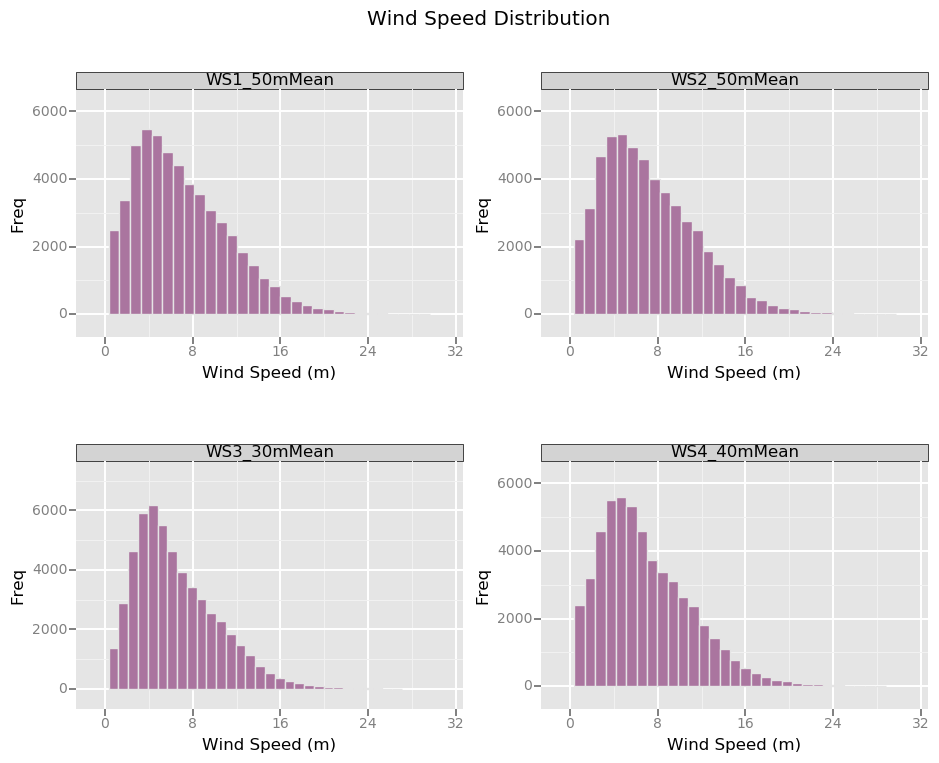

<ggplot: (8768283722585)>

In [12]:
molten = pd.melt(ws, value_vars=['WS1_50mMean', 'WS2_50mMean', 'WS3_30mMean', 'WS4_40mMean'])
(ggplot(gg.aes(x='value'), data=molten)\
 + gg.geom_histogram(fill='#aa759f')\
 + gg.facet_wrap('variable')\
 + gg.ggtitle("Wind Speed Distribution") \
 + gg.labs("Wind Speed (m)", "Freq"))

### IPython notebook widgets

As an aside, Jupyter notebooks with the Python kernel supports some pretty cool widgets that can make your plots interactive. In the next cells, we're going to use the interact widget to select the type of data that we want to look at in the plot over time.

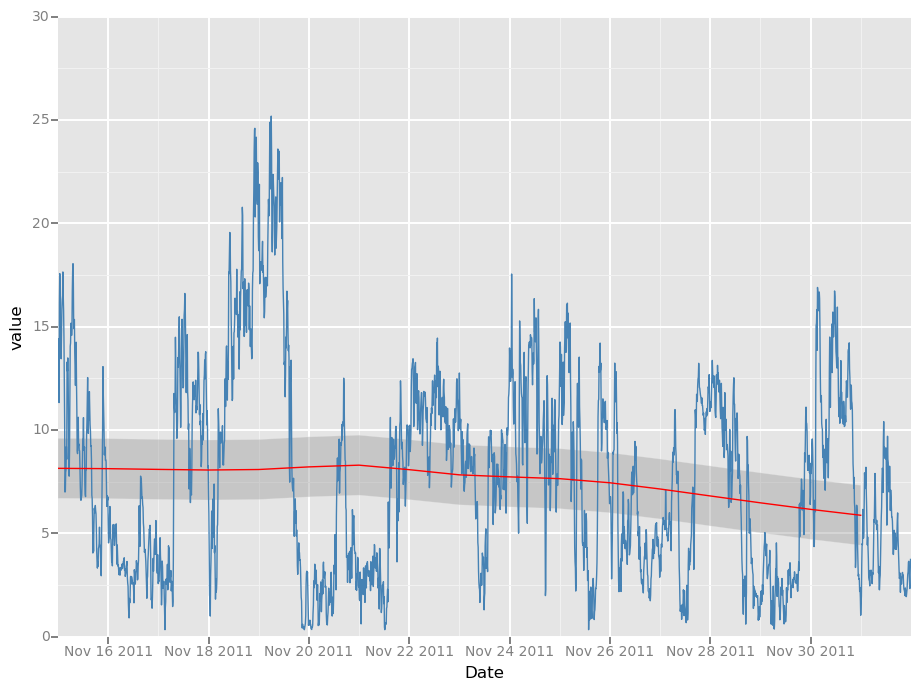

In [13]:
from ipywidgets import interact

november_2011['Date'] = november_2011.index
@interact
def plot_gg_ws(column=november_2011.columns.tolist()):
    molten = pd.melt(november_2011, 
                     value_vars=[column], 
                     id_vars=['Date'])
    gg_wind_data = ggplot(gg.aes(x='Date', y='value'), data=molten)\
        + gg.geom_line(color="steelblue")\
        + gg.stat_smooth(colour="red")
    gg_wind_data.draw()
    plt.show()


# Bokeh
Our third stop in the tour of Python visualization libraries is Bokeh. Bokeh is an **interactive** Python visualization library. By that, I mean that the graphs, plots, and charts that are produced by Bokeh can be played with interactively and viewed on a webpage, providing an additional "wow" factor. Not only are these visualization beautiful but they are also functional.

Use the various tools in the top right corner of each Bokeh plot to interact with the plot.

For more information about Bokeh, visit their [site](http://bokeh.pydata.org/en/latest/). Bokeh is open source and supported by Continuum Analytics.

In [14]:
output_notebook()
from bokeh.models import HoverTool
subset = min_heights[:1000]
plot_tools = "pan, wheel_zoom, box_zoom, reset, hover"

p = bp.figure(plot_width=800, background_fill= '#e5e5e5', tools = plot_tools)
p.scatter(subset['Total Height'], subset['Rotor Swept Area'], size=10, color='purple', alpha=1.0)
p.title = "Total Height (m) vs. Rotor Swept Area (m^2)"
p.xaxis.axis_label = "Rotor Swept Area (m^2)"
p.yaxis.axis_label = "Following"


hover = [t for t in p.tools if isinstance(t, HoverTool)][0]
hover.tooltips = {"(Rotor Swept Area, Total Height)": "(@x, @y)"}
bp.show(p)

Loading BokehJS ...

# Pygal
Pygal is a dynamic plotting library that is based on SVG, like D3. While it still lack first-class Jupyter notebook integration, it still produces great graphs that can be exported to HTML.

To produce the static plot, we will use IPython.display.HTML to display the html that is generated by Pygal.

In [15]:
%matplotlib inline
import pygal
from IPython.display import SVG, HTML
from pandas.tseries.offsets import *

by_year_chart = by_year.fillna(0)
years = pd.date_range('1980', '2013', freq='A-JAN')+MonthBegin(0)
by_year_chart = by_year.reindex(years, fill_value=0)
by_year_chart = by_year_chart.fillna(0)
#by_year_chart= by_year.fillna(0)

line_chart = pygal.StackedBar(x_label_rotation=50, x_labels_major_every=1,show_minor_x_labels=False)
line_chart.x_labels = map(lambda x: str(x)[0:4], by_year_chart.index)
for col in by_year_chart.columns:
    line_chart.add(col, by_year_chart[col])
HTML(line_chart.render())

### Interactive version of Pygal
To work with the interactive version of Pygal in Jupyter notebooks, we had to do a bit of hacking. A raw HTML template is created. We slide the HTML produced by `line_chart.render()` into the HTML template and render that HTML code ing the notebook.

In [16]:
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="https://cdn.rawgit.com/johnjoo1/pygal_js/master/pygal-tooltips.min.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      <!-- Pygal render() result: -->
        {pygal_render}
          <!-- ... -->
        </g>
      </svg>
      <!-- End of Pygal render() result: -->
    </figure>
  </body>
</html>
"""
HTML(html_pygal.format(pygal_render=line_chart.render()))

# Bearcart
[Rickshaw.js](http://code.shutterstock.com/rickshaw/) is a javascript visualization library, built on top of D3, specifically made for visualizing time-series data. Rickshaw is open-source but also supported by Shutterstock. 

[Bearcart](https://github.com/wrobstory/bearcart), like Vincent, is the child of Rob Story. It is a Python library that works with Pandas to output Rickshaw code. The visualizations that are produced are both beautiful, functional, specifically tuned to display time-series data, and easily produced from Pandas time-series data. 

In [17]:
by_year.dropna()
built_by_year = bearcart.Chart(by_year, palette='spectrum2000',
                               height=500, width=750, plt_type='bar')
built_by_year

In [18]:
all_ws = bearcart.Chart(november_2011[['WS1_50mMean', 'WS2_50mMean', 'WS3_30mMean', 'WS4_40mMean']], 
                        height=500, width=750, plt_type='area')
all_ws

In [19]:
all_wd = bearcart.Chart(november_2011[['WD1_49mMean', 'WD2_38mMean']], 
                        height=500, width=750, plt_type='bar',
                        colors={'WD1_49mMean': '#75b5aa', 'WD2_38mMean': '#aa759f'})
all_wd

# Seaborn
Seaborn has become especially popular as a visualization library in Python among data scientists because of its specialization in visualizing statistical data. It integrates well with Pandas, numpy, scipy, and statsmodels.

Check out more of Seaborn at their website [here](https://stanford.edu/~mwaskom/software/seaborn/index.html). 

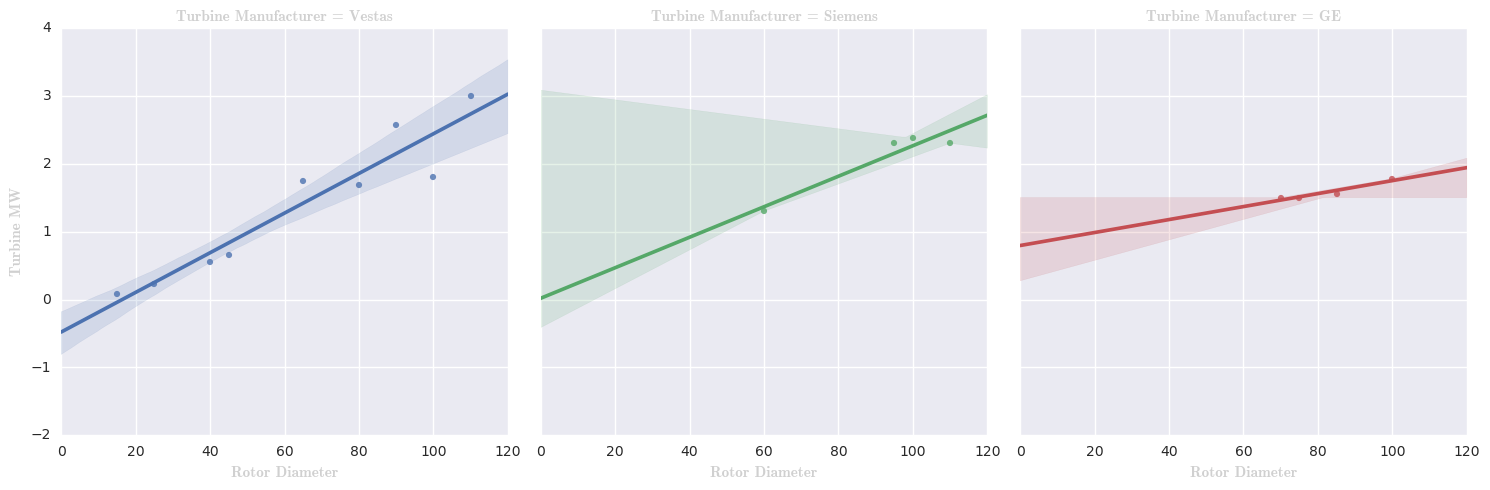

In [20]:
import seaborn as sb
sb.set(rc={'text.color': axis_color, 'axes.labelcolor': axis_color})
rvm = df[['Rotor Diameter', 'Turbine MW', 'Turbine Manufacturer']].dropna()
row_mask = rvm['Turbine Manufacturer'].isin(['Vestas', 'Siemens', 'GE'])
rvm = rvm[row_mask]
rvm['Rotor Diameter'] = rvm['Rotor Diameter'].apply(lambda x: int(5 * round(float(x)/5)))
grouped_rvm = rvm.groupby(['Rotor Diameter', 'Turbine Manufacturer'])
rvm = grouped_rvm.mean().reset_index()
sb.lmplot("Rotor Diameter", "Turbine MW", col="Turbine Manufacturer", 
          hue="Turbine Manufacturer", data=rvm)

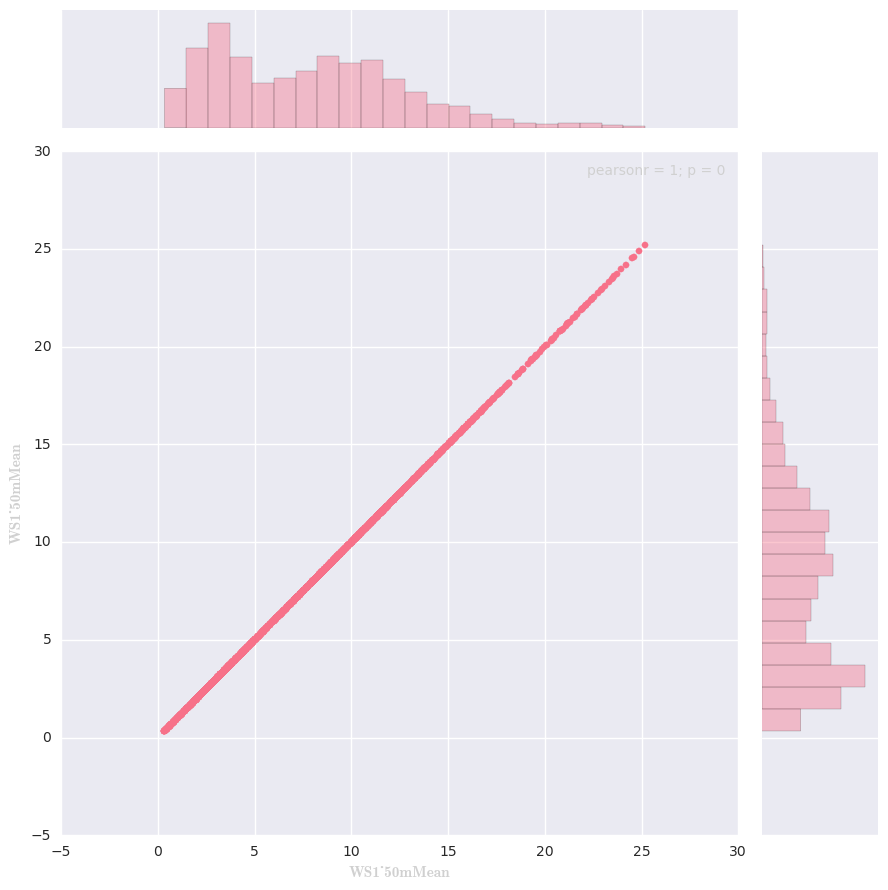

In [21]:
sb.set_palette('husl')
nov_cols = november_2011.columns.tolist()
@interact
def sb_jointplot(x=nov_cols, y=nov_cols):
    sb.jointplot(x, y, data=november_2011, size=9)

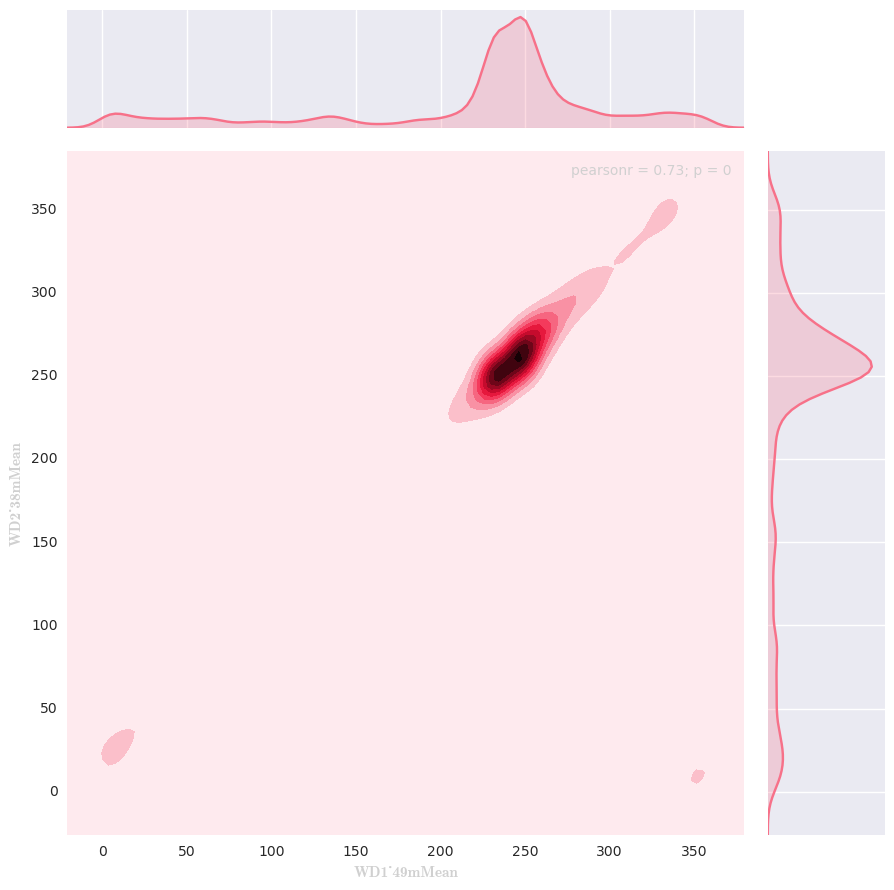

In [22]:
sb.jointplot('WD1_49mMean', 'WD2_38mMean', data=november_2011, size=9, kind='kde')

# Matplotlib
Matplotlib is the grand-daddy of Python data visualizations. If you are coming from the Matlab world, you should find Matplotlib pretty familiar as well. For a long time, it was essentially the only charting/plotting library for Python. The complaint was that the defaults were just really ugly and so it required a lot of custom tuning to get to half-way decent looking plots. 

That recently changed with the introduction of `styles` in Matplotlib. Below is a demonstration of some of the built-in styles of Matplotlib. The xkcd style is always fun to check out!

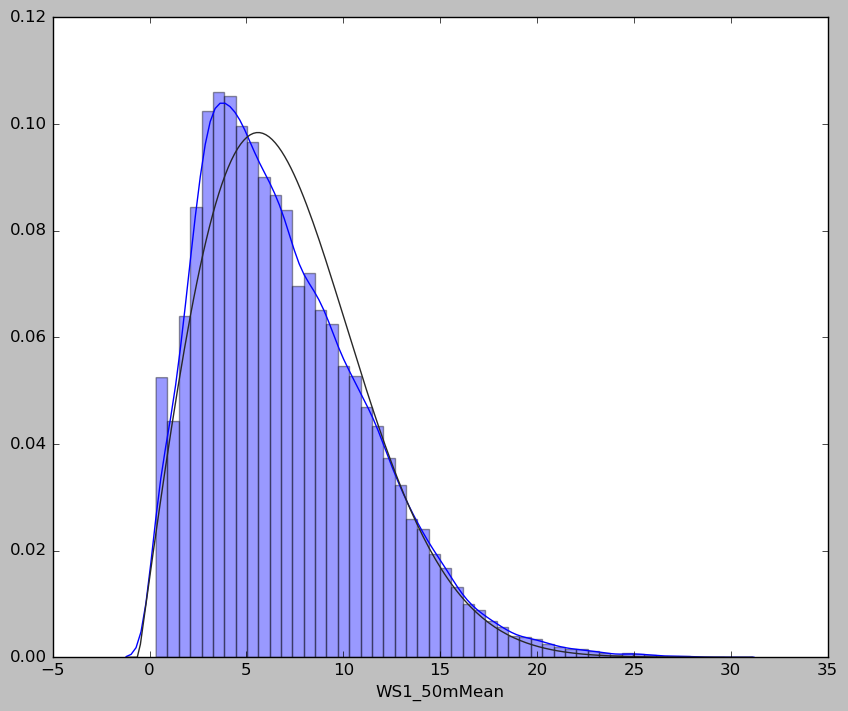

In [23]:
import scipy.stats as stats
from ipywidgets import interact

dists = ['Rayleigh', 'Weibull', 'Normal']
styles_list = ['classic', 'fivethirtyeight', 'bmh', 'grayscale', 'dark_background', 'ggplot']
styles = ['classic', 'fivethirtyeight', 'bmh', 'grayscale', 'dark_background', 'ggplot', 'xkcd']
@interact
def plot_sb_dist(column=ws.columns.tolist(), dist=dists, style = styles):
    if style in styles_list:
        plt.style.use(style)
        plt.figure(figsize=(10, 8))
        dist_map = {
            'Rayleigh': stats.rayleigh,
            'Weibull': stats.exponweib,
            'Normal': stats.norm,
        }
        sb.distplot(ws[column], fit=dist_map[dist])
    elif style == 'xkcd':
        with plt.xkcd():
            plt.figure(figsize=(10, 8))
            dist_map = {
                'Rayleigh': stats.rayleigh,
                'Weibull': stats.exponweib,
                'Normal': stats.norm,
            }
            sb.distplot(ws[column], fit=dist_map[dist])

# Folium
Last but not least is [Folium](https://folium.readthedocs.org/en/latest/). Folium is a Python library that uses Leaflet.js to visualize maps. The maps are sourced from OpenStreetMap, Mapbox, Stamen, or Cloudmade. It has bindings to Vincent, which you can see in one of the following examples. Support for GeoJSON and TopoJSON overlays allow you to generate chloropleth maps as well.

In [24]:
state_geo = r'us-states.json'
state_data = df.groupby('State').count().reset_index()#.drop('State', axis=1)
state_data = state_data[['State','Unique ID']]

geo_str=open('us-states.json').read()
import json
states = json.loads(geo_str)
states = pd.DataFrame(states)
states = [states['features'][i]['id'] for i in range(50)]
for state in states:
    if state in list(state_data['State']):
        pass
    else:
        state_data = state_data.append(pd.DataFrame({'State': state, 'Unique ID':0}, index=[0]), ignore_index=True)

state_map = folium.Map(location=[48, -102], zoom_start=3)

state_map.geo_json(geo_path=state_geo, data=state_data,
                   columns=['State', 'Unique ID'],
                   key_on='feature.id',
                   fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
                   legend_name='Turbine Count Per State')
state_map.create_map('turbines_per_state.html')
state_map

In the map below, click on the markers to see popovers associated with the marker.

In [25]:
Solano = df[df['Site Name'].isin(['Solano Wind 1', 'Solano Wind 3'])]
solano_map = folium.Map(location=[38.1067, -121.7735], zoom_start=12, 
                        tiles='Stamen Terrain')
solano_map.lat_lng_popover()
for row in Solano.iterrows():
    wtg_id = str(row[1]['Unique ID'])
    lat = row[1]['Latitude-Decimal Degrees']
    lng = row[1]['Longitude-Decimal Degrees']
    solano_map.polygon_marker(location=[lat, lng], fill_color='#f4bf75', 
                              radius=12, popup='WTG ID: ' + wtg_id)
solano_map.create_map('solano_map.html')
solano_map.render_iframe = True
solano_map

### Binding to Vincent
In the final example, you will be able to see Vincent-generated time-series plots byt clicking on the markers. The markers are locations where the wind was measured over time. The plotss in the popovers show how the wind speed varied over time

In [26]:
# Let's do a little more mapping
# Source: http://wind.nrel.gov/Web_nrel/
wind_map = folium.Map(location=[45.48, -121.7], zoom_start=10,
                      tiles='Stamen Terrain')
locations = {
    'df_26512': (45.38, -121.52),
    'df_26795': (45.48, -121.72),
    'df_26798': (45.48, -121.62)
}
data = {
    'df_26512': pd.read_csv('26512.csv'),
    'df_26795': pd.read_csv('26795.csv'),
    'df_26798': pd.read_csv('26798.csv')
}
charts = {
    'df_26512': None, 
    'df_26795': None, 
    'df_26798': None
}
for k, df in data.items():
    df['Date'] = pd.to_datetime(df['Date(YYYY-MM-DD hh:mm:ss)'])
    data[k] = df.drop('Date(YYYY-MM-DD hh:mm:ss)', axis=1).set_index('Date')
    data[k] = data[k]['2006-12-01': '2006-12-31']
for k, chart in charts.items():
    charts[k] = (vincent.Line(data[k]['100m wind speed (m/s)'],
                              width=400, height=200)
                        .colors(range_=['#6a9fb5']))
    charts[k].axes[0].ticks = 4
    charts[k].axis_titles(x='Date', y='100m wind speed (m/s)')
    path = ''.join([k, '.json'])
    charts[k].to_json(path)
    folium.RegularPolygonMarker(
        location=locations[k],
        fill_color='#6a9fb5',
        radius=12,
        popup=folium.Popup(max_width=450).add_child(
            folium.Vega(json.load(open(path)), width=450, height=250))
        ).add_to(wind_map)
wind_map.create_map(path = 'wind_map.html')
wind_map.render_iframe = True
wind_map
